<b>Tasks:</b>
- Construct EDA process
- Drop emissions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1. Load Data
df = pd.read_csv('datasets_features\glass.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
# Step 2. Class balance
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Классы плохо сбалансированны.

In [5]:
# Step 3-4-5. Split and getting metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


def get_score(X, y, model=None):
    print(f'Deleted share: {1- len(X)/214}')
    
    if model==None:
        model = RandomForestClassifier()
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model.fit(X_train, y_train)
    print(classification_report(np.array(y_test), model.predict(X_test)))
    
get_score(df.drop(columns=['Type']), df.Type)

Deleted share: 0.0
              precision    recall  f1-score   support

           1       0.69      0.95      0.80        19
           2       0.82      0.61      0.70        23
           3       0.50      0.25      0.33         4
           5       0.80      0.67      0.73         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.75      0.75      0.73        65
weighted avg       0.77      0.77      0.76        65



<b>Step 6. Histograms</b>

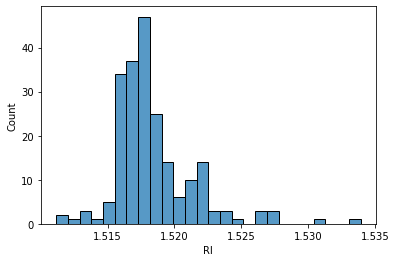

In [6]:
g = sns.histplot(data=df, x="RI") # df.RI < 1525

<AxesSubplot:xlabel='Na', ylabel='Count'>

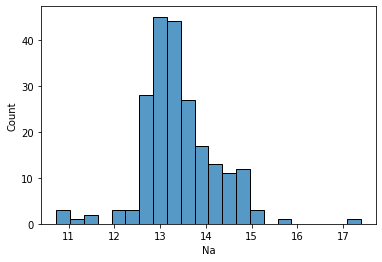

In [7]:
sns.histplot(data=df, x="Na") # df.Na < 15.5

<AxesSubplot:xlabel='Mg', ylabel='Count'>

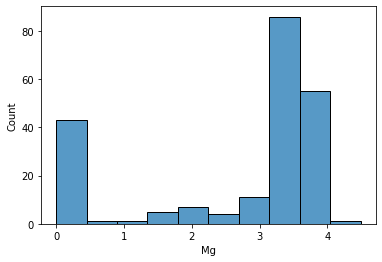

In [8]:
sns.histplot(data=df, x="Mg") # df.Mg -> log

<AxesSubplot:xlabel='Al', ylabel='Count'>

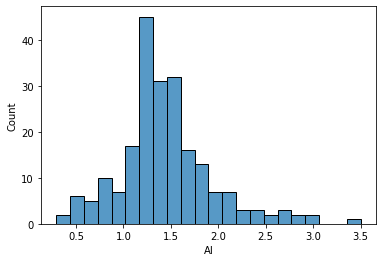

In [9]:
sns.histplot(data=df, x="Al") # df.Al < 3.2

<AxesSubplot:xlabel='Si', ylabel='Count'>

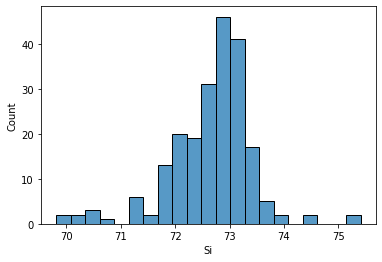

In [10]:
sns.histplot(data=df, x="Si") # (df.Si >71) & (df.Si < 74)

<AxesSubplot:xlabel='K', ylabel='Count'>

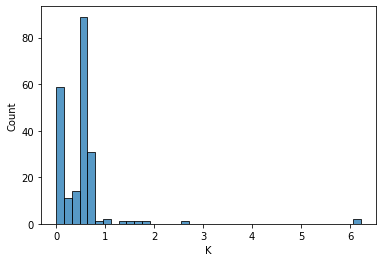

In [11]:
sns.histplot(data=df, x="K") # df.K -> log

<AxesSubplot:xlabel='Ca', ylabel='Count'>

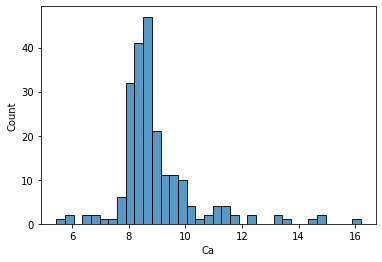

In [12]:
sns.histplot(data=df, x="Ca") # (df.Ca < 12) & (df.Ca > 6)

<AxesSubplot:xlabel='Ba', ylabel='Count'>

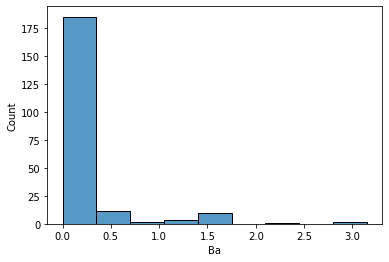

In [13]:
sns.histplot(data=df, x="Ba") # > df.Ba -> log

<AxesSubplot:xlabel='Fe', ylabel='Count'>

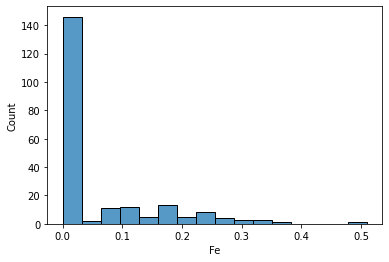

In [14]:
sns.histplot(data=df, x="Fe") # > df.Fe -> log

In [15]:
# Delete emissions 
df_without_emissions = df.copy()
df_without_emissions = df_without_emissions[df.RI < 1525]
df_without_emissions = df_without_emissions[df.Na < 15.5]
df_without_emissions = df_without_emissions[df.Al < 3.2]
df_without_emissions = df_without_emissions[(df.Si > 71) & (df.Si < 74)]
df_without_emissions = df_without_emissions[(df.Ca < 12) & (df.Ca > 6)]

get_score(df_without_emissions.drop(columns=['Type']), df_without_emissions.Type)

Deleted share: 0.09813084112149528
              precision    recall  f1-score   support

           1       0.79      0.83      0.81        23
           2       0.76      0.76      0.76        17
           3       0.29      0.33      0.31         6
           5       1.00      0.80      0.89         5
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         3

    accuracy                           0.76        58
   macro avg       0.81      0.75      0.77        58
weighted avg       0.77      0.76      0.76        58



In [16]:
# Log features
df_without_emissions.Mg = np.log(df_without_emissions.Mg)
df_without_emissions.K = np.log(df_without_emissions.K)
df_without_emissions.Ba = np.log(df_without_emissions.Ba)
df_without_emissions.Fe = np.log(df_without_emissions.Fe)
df_without_emissions.replace([np.inf, -np.inf], -999, inplace=True)
get_score(df_without_emissions.drop(columns=['Type']), df_without_emissions.Type)

Deleted share: 0.09813084112149528
              precision    recall  f1-score   support

           1       0.80      0.87      0.83        23
           2       0.78      0.82      0.80        17
           3       0.40      0.33      0.36         6
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3

    accuracy                           0.79        58
   macro avg       0.83      0.77      0.79        58
weighted avg       0.79      0.79      0.79        58



Удаление выбросов по гистограммам и логарифмирование фичей не привело к приросту точности предсказания метки класса.

In [17]:
# Применение методов машинного обучения
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor


def get_score_without_emissions(df, search_emissions=None):
    
    if search_emissions==None:
        search_emissions = [
            OneClassSVM(nu=0.01), 
            IsolationForest(), 
            EllipticEnvelope(contamination=0.03), 
            LocalOutlierFactor(novelty=True)
        ]
    
    for model in search_emissions:
        print('\n___' + str(model))
        df_iter = df.copy()
        df_iter['emission'] = model.fit(df_iter).predict(df_iter)
        get_score(df_iter[df_iter.emission == 1].drop(columns=['Type', 'emission']), df_iter[df_iter.emission == 1].Type)
 

get_score_without_emissions(df)


___OneClassSVM(nu=0.01)
Deleted share: 0.009345794392523366
              precision    recall  f1-score   support

           1       0.78      0.95      0.86        19
           2       0.79      0.79      0.79        24
           3       0.80      0.80      0.80         5
           5       1.00      0.25      0.40         4
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.81        64
   macro avg       0.88      0.72      0.76        64
weighted avg       0.83      0.81      0.80        64


___IsolationForest()
Deleted share: 0.12616822429906538
              precision    recall  f1-score   support

           1       0.75      0.75      0.75        24
           2       0.50      0.73      0.59        15
           3       0.50      0.17      0.25         6
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7  

In [18]:
# DBSCAN
from sklearn.cluster import DBSCAN

df_iter = df.copy()

db = DBSCAN(eps=0.95, min_samples=2).fit(df_iter)
df_iter['emission'] = db.labels_

get_score(df_iter[df_iter.emission != -1].drop(columns=['Type', 'emission']), df_iter[df_iter.emission != -1].Type)

Deleted share: 0.14018691588785048
              precision    recall  f1-score   support

           1       0.86      0.72      0.78        25
           2       0.67      0.94      0.78        17
           3       0.67      0.33      0.44         6
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.79        56
   macro avg       0.87      0.83      0.83        56
weighted avg       0.80      0.79      0.78        56



|                      | accuracy | deleted share |
|----------------------|----------|---------------|
|Без преобразований    |   0.77   |       0%      |
|Статистический метод  |   0.76   |       10%     |
|Логарифмирование      |   0.79   |       -       |
|OneClassSVM           |   0.81   |       1%      |
|IsolationForest       |   0.68   |       12%     |
|EllipticEnvelope      |   0.83   |       3%      |
|LocalOutlierFactor    |   0.75   |       14%     |
|DBSCAN                |   0.79   |       14%     |

<b>Выводы:<b>
- избавление от выбросов статистическим (или почти ручным) методом привело к ухудшению качества модели.
- методы машинного обучения показали прирост в несколько процентов (4%, 6% и 2% для методов OneClassSVM, EllipticEnvelope и DBSCAN соответсвенно)
- исследовать данные на выбросы целесообразно и полезно, т.к. модель при обучении не отвлекается на исключительные случаи, что приводит к улучшению ее качества.